# Supervised Machine Learning

## K Nearest Neighbors Classification Model

This notebook highlights the functioning of the KNN classifier model from the SciKit learn module of Python. The basic idea is to use this algorithm to help classify data using labeled data.

In the following example, we will be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images. On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.

In [2]:
# Importing the relevant modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Downloading the digits dataset from the SKlearn module
digits = datasets.load_digits()

#Creating feature & target arrays
X = digits.data
y = digits.target

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

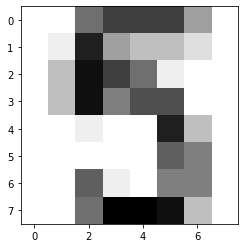

In [6]:
# Print the keys and DESCR (dataset description) of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Splitting the dataset 

As we can see above, the handwritten digit here corresponds to 5 & shows how the images look like in pictorial format. We will now split our dataset into test & train which will allow us to first train the classification model on a part of our data and then we can test the fit of the model with labelled test data. This can help us gauge the accuracy of the classification model. 

The key to a highly accurate model is it's fit. If we overft the model to our data by choosing low values of nearest neighbors, it will be highly accurate in predicting values for our dataset but it won't be flexible enough to work with new incoming datasets which are significantly different from the current one. If we underfit it by using high number of nearest neighbors, the model would be too general in it's classification strategy and would not be accurate enough. This is why we will need to evaluate several nearest neighbor values and plot the accuracy data for both the test & training set to find the best nearest neighbor number for a good fit.

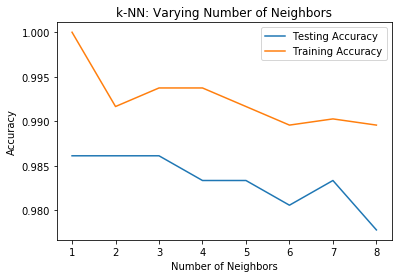

In [8]:
# Split into training and test set
# We choose a split fo 80-20 between the training & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# It looks like the test & training accuracy is highest when using 3 neighbors. 
# Using 8 neighbors or more seems to result in a simple model that underfits the data

# Final Thoughts

The example above is a good indication of how to choose the nearest neighbor number for the KNN classification model. We can use this model for classification problems where there are two or more classifications for the dataset. We can further use the n_neighbors = 3 parameter to fit the model and then predict values for a new dataset.